In [112]:
import pandas
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [2]:
connection = sqlite3.connect('nearby_stars.db')
c = connection.cursor()

## Add full age tables to database

In [3]:
age_tab = pandas.read_csv('gaspar13_agetable.csv')
age_tab.to_sql('gaspar13_agetable', connection)

In [15]:
age_tab = pandas.read_csv('ramirez13_agetable.csv')
age_tab.to_sql('ramirez13_agetable', connection)

In [88]:
age_tab = pandas.read_csv('ramirez12_agetable.csv')
age_tab.to_sql('ramirez12_agetable', connection)

In [4]:
c.execute('PRAGMA table_info(gaspar13_agetable);')
c.fetchall()

[(0, u'index', u'INTEGER', 0, None, 0),
 (1, u'recno', u'INTEGER', 0, None, 0),
 (2, u'S', u'TEXT', 0, None, 0),
 (3, u'Name', u'TEXT', 0, None, 0),
 (4, u'n_Name', u'TEXT', 0, None, 0),
 (5, u'SpT', u'TEXT', 0, None, 0),
 (6, u'Age', u'REAL', 0, None, 0),
 (7, u'q_Age', u'REAL', 0, None, 0),
 (8, u'r_Age', u'TEXT', 0, None, 0),
 (9, u'P24', u'INTEGER', 0, None, 0),
 (10, u'P70', u'REAL', 0, None, 0),
 (11, u'P100', u'REAL', 0, None, 0),
 (12, u'F24', u'REAL', 0, None, 0),
 (13, u'e_F24', u'REAL', 0, None, 0),
 (14, u'R24', u'REAL', 0, None, 0),
 (15, u'F70', u'REAL', 0, None, 0),
 (16, u'e_F70', u'REAL', 0, None, 0),
 (17, u'chi70', u'REAL', 0, None, 0),
 (18, u'F100', u'REAL', 0, None, 0),
 (19, u'f_F100', u'TEXT', 0, None, 0),
 (20, u'e_F100', u'REAL', 0, None, 0),
 (21, u'chi100', u'REAL', 0, None, 0),
 (22, u'FIR?', u'TEXT', 0, None, 0),
 (23, u'DD', u'INTEGER', 0, None, 0),
 (24, u'_RA', u'REAL', 0, None, 0),
 (25, u'_DE', u'REAL', 0, None, 0)]

In [16]:
c.execute('PRAGMA table_info(ramirez13_agetable);')
c.fetchall()

[(0, u'index', u'INTEGER', 0, None, 0),
 (1, u'Name', u'TEXT', 0, None, 0),
 (2, u'Plx', u'REAL', 0, None, 0),
 (3, u'Age', u'REAL', 0, None, 0),
 (4, u'Age_lo1sig', u'REAL', 0, None, 0),
 (5, u'Age_hi1sig', u'REAL', 0, None, 0),
 (6, u'Age_lo2sig', u'REAL', 0, None, 0),
 (7, u'Age_hi2sig', u'REAL', 0, None, 0)]

In [89]:
c.execute('PRAGMA table_info(ramirez12_agetable);')
c.fetchall()

[(0, u'index', u'INTEGER', 0, None, 0),
 (1, u'HIP', u'INTEGER', 0, None, 0),
 (2, u'Age', u'REAL', 0, None, 0),
 (3, u'Age_lolim', u'REAL', 0, None, 0),
 (4, u'Age_hilim', u'REAL', 0, None, 0)]

## Create subquery connecting star in Gaspar+2013 table to star in main simbad_FGK_nobinaries table

In [8]:
cmd = '''
SELECT LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD'))
FROM stars_FGK_nobinaries
    ---LEFT OUTER JOIN gaspar13_agetable
    ---ON LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HD')),'0') LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD'))
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

227
(u'22049',)
(u'10700',)
(u'20794',)
(u'190248',)
(u'219134',)
(u'2151',)
(u'157881',)
(u'217357',)
(u'115617',)
(u'1581',)
(u'192310',)
(u'32147',)
(u'23249',)
(u'103095',)
(u'203608',)
(u'151288',)
(u'122064',)
(u'103932',)
(u'43834',)
(None,)
(u'166620',)
(u'3651',)
(u'74576',)
(u'85512',)
(u'245409',)
(u'222237',)
(u'125072',)
(u'72673',)
(u'196877',)
(u'21531',)
(u'69830',)
(u'104304',)
(u'190007',)
(u'101581',)
(u'82106',)
(u'158633',)
(u'14412',)
(u'40307',)
(u'27274',)
(u'211970',)
(u'170657',)
(u'29697',)
(u'30495',)
(u'128165',)
(u'214749',)
(None,)
(u'10436',)
(u'22496',)
(u'145417',)
(u'154577',)
(u'95128',)
(u'281621',)
(u'23356',)
(u'22484',)
(u'5133',)
(u'120467',)
(u'110315',)
(u'150689',)
(u'234078',)
(u'173818',)
(u'72905',)
(None,)
(None,)
(u'52698',)
(u'196761',)
(u'197692',)
(u'136352',)
(None,)
(u'142709',)
(None,)
(u'205390',)
(u'84117',)
(u'144628',)
(u'218511',)
(u'40136',)
(u'105452',)
(None,)
(u'118926',)
(u'7570',)
(u'38858',)
(u'21197',)
(u'217014',)
(u'

In [9]:
cmd = '''
SELECT gaspar13_agetable.Name, RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HD')),'0'))
FROM gaspar13_agetable
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

374
(u'HD 000038 ', u'38')
(u'HD 000739 ', u'739')
(u'HD 001237 ', u'1237')
(u'HD 001326 ', u'1326')
(u'HD 001404 ', u'1404')
(u'HD 001581 ', u'1581')
(u'HD 001835 ', u'1835')
(u'HD 002262 ', u'2262')
(u'HD 003196 ', u'3196')
(u'HD 004391 ', u'4391')
(u'HD 004628 ', u'4628')
(u'HD 004676 ', u'4676')
(u'HD 004747 ', u'4747')
(u'HD 004967 ', u'4967')
(u'HD 005448 ', u'5448')
(u'HD 007439 ', u'7439')
(u'HD 007570 ', u'7570')
(u'HD 007788 ', u'7788')
(u'HD 009540 ', u'9540')
(u'HD 010307 ', u'10307')
(u'HD 010361 ', u'10361')
(u'HD 010476 ', u'10476')
(u'HD 011171 ', u'11171')
(u'HD 011636 ', u'11636')
(u'HD 013161 ', u'13161')
(u'HD 013974 ', u'13974')
(u'HD 014055 ', u'14055')
(u'HD 015008 ', u'15008')
(u'HD 016160 ', u'16160')
(u'HD 016555 ', u'16555')
(u'HD 016673 ', u'16673')
(u'HD 016754 ', u'16754')
(u'HD 016765 ', u'16765')
(u'HD 016970 ', u'16970')
(u'HD 017051 ', u'17051')
(u'HD 017093 ', u'17093')
(u'HD 017206 ', u'17206')
(u'HD 018978 ', u'18978')
(u'HD 019107 ', u'19107')
(u'H

In [45]:
cmd = '''
SELECT gaspar13_agetable.Name, stars_FGK_nobinaries.HD, stars_FGK_nobinaries.HIP, gaspar13_agetable.Age
FROM gaspar13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HD')),'0')) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD')))
    OR (RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HIP')),'0')) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP')))
WHERE gaspar13_agetable.Age is NOT NULL
    
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

87
(u'HD 001581 ', u'HD   1581', u'HIP   1599', 382.0)
(u'HD 007570 ', u'HD   7570', u'HIP   5862', 530.0)
(u'HD 017051 ', u'HD  17051', u'HIP  12653', 120.0)
(u'HD 020794 ', u'HD  20794', u'HIP  15510', 620.0)
(u'HD 021197 ', u'HD  21197', u'HIP  15919', 150.0)
(u'HD 022484 ', u'HD  22484', u'HIP  16852', 670.0)
(u'HD 022496 ', u'HD  22496', u'HIP  16711', 130.0)
(u'HD 023754 ', u'HD  23754', u'HIP  17651', 400.0)
(u'HD 036435 ', u'HD  36435', u'HIP  25544', 50.0)
(u'HD 039091 ', u'HD  39091', u'HIP  26394', 580.0)
(u'HD 071243 ', u'HD  71243', u'HIP  40702', 150.0)
(u'HD 084737 ', u'HD  84737', u'HIP  48113', 930.0)
(u'HD 101581 ', u'HD 101581', u'HIP  56998', 260.0)
(u'HD 105452 ', u'HD 105452', u'HIP  59199', 100.0)
(u'HD 109085 ', u'HD 109085', u'HIP  61174', 240.0)
(u'HD 110315 ', u'HD 110315', u'HIP  61901', 660.0)
(u'HD 115617 ', u'HD 115617', u'HIP  64924', 502.0)
(u'HD 120467 ', u'HD 120467', u'HIP  67487', 435.0)
(u'HD 136923 ', u'HD 136923', u'HIP  75277', 300.0)
(u'HD 1397

## Subquery for Ramirez+2013

In [61]:
cmd = '''
SELECT stars_FGK_nobinaries.hip, ramirez13_agetable.Name, 
stars_FGK_nobinaries.hd, ramirez13_agetable.Name, ramirez13_agetable.Plx, ramirez13_agetable.Age
FROM ramirez13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(ramirez13_agetable.Name,'HIP'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP')))
    OR (RTRIM(LTRIM(LTRIM(ramirez13_agetable.Name,'HD'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD')))
WHERE ramirez13_agetable.Age IS NOT Null
ORDER BY Plx DESC
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

43
(u'HIP  16537', u'HIP 16537 ', u'HD  22049', u'HIP 16537 ', 310.94, 9.45)
(u'HIP   8102', u'HIP 8102  ', u'HD  10700', u'HIP 8102  ', 273.96, 13.16)
(u'HIP  15510', u'HIP 15510 ', u'HD  20794', u'HIP 15510 ', 165.47, 14.26)
(u'HIP  99240', u'HIP 99240 ', u'HD 190248', u'HIP 99240 ', 163.71, 10.65)
(u'HIP 114622', u'HIP 114622', u'HD 219134', u'HIP 114622', 152.76, 10.93)
(u'HIP   2021', u'HIP 2021  ', u'HD   2151', u'HIP 2021  ', 134.07, 6.09)
(u'HIP  64924', u'HIP 64924 ', u'HD 115617', u'HIP 64924 ', 116.89, 9.18)
(u'HIP   1599', u'HIP 1599  ', u'HD   1581', u'HIP 1599  ', 116.46, 6.31)
(u'HIP  99825', u'HIP 99825 ', u'HD 192310', u'HIP 99825 ', 112.22, 9.41)
(u'HIP  57939', u'HIP 57939 ', u'HD 103095', u'HIP 57939 ', 109.99, 13.88)
(u'HIP 105858', u'HIP 105858', u'HD 203608', u'HIP 105858', 107.97, 6.86)
(u'HIP  68184', u'HIP 68184 ', u'HD 122064', u'HIP 68184 ', 99.36, 13.89)
(u'HIP  29271', u'HIP 29271 ', u'HD  43834', u'HIP 29271 ', 98.06, 6.28)
(u'HIP   3093', u'HIP 3093  ', 

## Subquery for Ramirez+2013

In [92]:
cmd = '''
SELECT stars_FGK_nobinaries.hip, ramirez12_agetable.hip, ramirez12_agetable.Age
FROM ramirez12_agetable
    INNER JOIN stars_FGK_nobinaries
    ON ramirez12_agetable.hip LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP'))
WHERE ramirez12_agetable.Age IS NOT Null
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

86
(u'HIP   3206', 3206, 4.94)
(u'HIP  40843', 40843, 3.3)
(u'HIP  44897', 44897, 0.8)
(u'HIP  53721', 53721, 6.82)
(u'HIP  48113', 48113, 5.85)
(u'HIP  34017', 34017, 6.8)
(u'HIP  35136', 35136, 7.63)
(u'HIP  42438', 42438, 0.2)
(u'HIP  71395', 71395, 0.3)
(u'HIP  67275', 67275, 0.4)
(u'HIP  78459', 78459, 2.5)
(u'HIP  77760', 77760, 6.85)
(u'HIP  79248', 79248, 2.53)
(u'HIP  62207', 62207, 9.45)
(u'HIP  85235', 85235, 8.67)
(u'HIP  68184', 68184, 8.71)
(u'HIP 107350', 107350, 0.2)
(u'HIP  98505', 98505, 0.4)
(u'HIP 114622', 114622, 9.45)
(u'HIP 100017', 100017, 4.81)
(u'HIP 116763', 116763, 7.23)
(u'HIP    910', 910, 5.65)
(u'HIP   8102', 8102, 5.6)
(u'HIP   3909', 3909, 1.72)
(u'HIP   3093', 3093, 6.7)
(u'HIP 113357', 113357, 5.2)
(u'HIP  33817', 33817, 2.0)
(u'HIP  22263', 22263, 0.4)
(u'HIP  28103', 28103, 1.26)
(u'HIP  27435', 27435, 7.5)
(u'HIP  23311', 23311, 4.5)
(u'HIP  18859', 18859, 2.65)
(u'HIP  16852', 16852, 6.0)
(u'HIP  29525', 29525, 0.4)
(u'HIP  57507', 57507, 12.5)
(

## Add new ages to table

In [77]:
cmd = '''
SELECT * FROM ages WHERE bibcode = '2013ApJ...764...78R'
'''
c.execute(cmd)
rows=c.fetchall()
print len(rows)

43


In [63]:
cmd = '''
DELETE FROM ages
WHERE bibcode = '2013ApJ...764...78R'
'''
c.execute(cmd)

In [55]:
cmd = '''
INSERT INTO ages (age, bibcode, sid)
SELECT gaspar13_agetable.Age/100, '2013ApJ...768...25G', stars_FGK_nobinaries.sid
FROM gaspar13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HD')),'0')) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD')))
    OR (RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HIP')),'0')) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP')))
WHERE gaspar13_agetable.Age is NOT NULL
'''
c.execute(cmd)

In [64]:
cmd = '''
INSERT INTO ages (age, bibcode, sid)
SELECT ramirez13_agetable.Age, '2013ApJ...764...78R', stars_FGK_nobinaries.sid
FROM ramirez13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(ramirez13_agetable.Name,'HIP'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP')))
    OR (RTRIM(LTRIM(LTRIM(ramirez13_agetable.Name,'HD'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD')))
WHERE ramirez13_agetable.Age is NOT NULL
'''
c.execute(cmd)

In [93]:
cmd = '''
INSERT INTO ages (age, bibcode, sid)
SELECT ramirez12_agetable.Age, '2012ApJ...756...46R', stars_FGK_nobinaries.sid
FROM ramirez12_agetable
    INNER JOIN stars_FGK_nobinaries
    ON ramirez12_agetable.hip LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP'))
WHERE ramirez12_agetable.Age IS NOT Null
'''
c.execute(cmd)

In [94]:
connection.commit()

In [95]:
c.close()

## Check table

In [96]:
connection = sqlite3.connect('nearby_stars.db')
c = connection.cursor()

Number of stars with at least one age measurement:

In [99]:
cmd = '''
SELECT COUNT (DISTINCT stars_FGK_nobinaries.sid)
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
'''
c.execute(cmd)
rows = c.fetchall()
for row in rows:
    print row

(121,)


Number of stars with more than one age measurement:

In [98]:
cmd = '''
SELECT COUNT(*)
FROM (SELECT COUNT(*)
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
HAVING COUNT(*) > 1)
'''
c.execute(cmd)
rows = c.fetchall()
for row in rows:
    print row

(79,)


Range of ages for stars with multiple measurements.

In [102]:
cmd = '''
SELECT stars_FGK_nobinaries.sid, stars_FGK_nobinaries.main_id, MIN(ages.age), MAX(ages.age), 
100*(MAX(ages.age) - MIN(ages.age))/AVG(ages.age)
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
HAVING COUNT(*) > 1
ORDER BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

79
(0, u'* eps Eri', 0.4, 9.45, 254.92957746478868)
(1, u'* tau Cet', 5.6, 13.16, 92.34527687296416)
(2, u'* e Eri', 6.1, 14.38, 80.89887640449439)
(3, u'* del Pav', 6.9, 10.65, 45.05406487785343)
(4, u'HD 219134', 9.45, 10.93, 14.524043179587837)
(5, u'* bet Hyi', 6.09, 6.15, 0.9803921568627532)
(8, u'*  61 Vir', 4.2, 9.18, 81.3061224489796)
(9, u'* zet Tuc', 2.1, 7.16, 104.38370293965963)
(10, u'HD 192310', 6.1, 9.41, 40.68004916018026)
(11, u'HD  32147', 4.5, 5.5, 20.0)
(13, u'HD 103095', 4.5, 13.88, 118.83445945945947)
(14, u'* gam Pav', 0.57, 6.86, 136.83828861493836)
(16, u'HD 122064', 5.5, 13.89, 89.5729537366548)
(18, u'* alf Men', 4.9, 6.28, 25.461254612546124)
(20, u'HD 166620', 5.4, 7.1, 27.86885245901639)
(21, u'*  54 Psc', 1.96, 7.7, 100.43744531933508)
(22, u'HD  74576', 2.96, 6.43, 73.9084132055378)
(25, u'HD 222237', 3.5, 13.14, 115.86538461538461)
(26, u'HD 125072', 8.67, 8.67, 0.0)
(27, u'HD  72673', 6.5, 8.67, 27.307046979865774)
(30, u'HD  69830', 4.86, 7.4, 41.7077

Stars whose only age measurement is from a given bibcode:

In [86]:
cmd = '''
SELECT stars_FGK_nobinaries.sid, stars_FGK_nobinaries.main_id, COUNT(*), ages.bibcode, ages.age
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
HAVING COUNT(*)= 1 AND ages.bibcode = '2013ApJ...764...78R'
ORDER BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

8
(4, u'HD 219134', 1, u'2013ApJ...764...78R', 10.93)
(5, u'* bet Hyi', 1, u'2013ApJ...764...78R', 6.09)
(22, u'HD  74576', 1, u'2013ApJ...764...78R', 2.96)
(26, u'HD 125072', 1, u'2013ApJ...764...78R', 8.67)
(120, u'HD  65583', 1, u'2013ApJ...764...78R', 14.14)
(130, u'HD 193664', 1, u'2013ApJ...764...78R', 3.91)
(153, u'HD   3765', 1, u'2013ApJ...764...78R', 3.45)
(217, u'HD 157347', 1, u'2013ApJ...764...78R', 5.88)


In [100]:
cmd = '''
SELECT stars_FGK_nobinaries.sid, stars_FGK_nobinaries.main_id, COUNT(*), ages.bibcode, ages.age
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
HAVING COUNT(*)= 1 AND ages.bibcode = '2012ApJ...756...46R'
ORDER BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

10
(71, u'HD  84117', 1, u'2012ApJ...756...46R', 3.78)
(104, u'HD 128311', 1, u'2012ApJ...756...46R', 0.3)
(110, u'HD 152391', 1, u'2012ApJ...756...46R', 0.6)
(117, u'HD 177565', 1, u'2012ApJ...756...46R', 4.17)
(144, u'HD  30876', 1, u'2012ApJ...756...46R', 10.16)
(182, u'HD  42807', 1, u'2012ApJ...756...46R', 0.4)
(187, u'HD  25457', 1, u'2012ApJ...756...46R', 2.65)
(216, u'HD 192263', 1, u'2012ApJ...756...46R', 1.5)
(221, u'HD 189733', 1, u'2012ApJ...756...46R', 0.4)
(222, u'HD 110810', 1, u'2012ApJ...756...46R', 10.16)


What percentage of stars lack age measurements and what are the parallaxes of the two stellar samples?

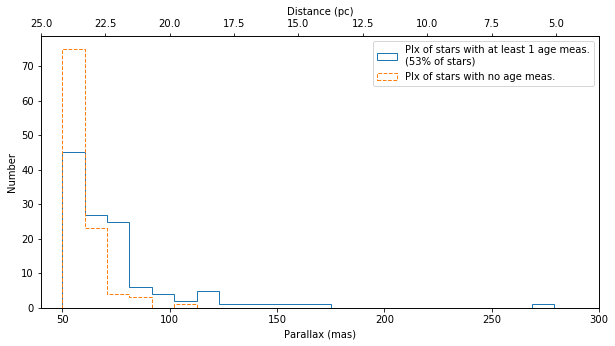

In [154]:
cmd = '''
SELECT stars_FGK_nobinaries.plx_value
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
plx_yesage = c.fetchall()

cmd = '''
SELECT stars_FGK_nobinaries.plx_value
FROM  stars_FGK_nobinaries
LEFT OUTER JOIN ages ON stars_FGK_nobinaries.sid = ages.sid
WHERE ages.age IS Null
GROUP BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
plx_noage = c.fetchall()

plt.figure(figsize=(10,5))
plt.hist(np.array(plx_yesage)[:,0],histtype='step',
         label='Plx of stars with at least 1 age meas.\n({:1.0f}% of stars)'.format(100*float(len(plx_yesage))/(len(plx_yesage) + len(plx_noage))),
         bins = np.linspace(50,300,25))
plt.hist(np.array(plx_noage)[:,0],histtype='step',label='Plx of stars with no age meas.',
         bins = np.linspace(50,300,25),linestyle='dashed')
plt.legend()
plt.xlim(40,300)
plt.xlabel('Parallax (mas)')
plt.ylabel('Number')
axdist = plt.gca().twiny()
#axdist.hist(1/(np.array(plx_noage)[:,0]*1e-3),histtype='step',
#           bins = np.linspace(50,300,25),linestyle='dashed')
axdist.set_xlim(1/40e-3,1/300e-3)
axdist.set_xlabel('Distance (pc)')
plt.show()

In [94]:
c.close()